Connecting to google drive in order to get access to content

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import torch
import cv2
import matplotlib.pyplot as plt

/home/igor-simoes/Documentos/GIT/TAIL/Personal Stylist /Personal-StAIlist/back-end/back-end/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Connecting to yolov5 


In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14570, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 14570 (delta 46), reused 50 (delta 26), pack-reused 14478
Receiving objects: 100% (14570/14570), 13.74 MiB | 6.98 MiB/s, done.
Resolving deltas: 100% (10028/10028), done.


In [2]:
model = torch.hub.load('./yolov5', 'custom', path='best.pt', source='local')

fatal: cannot change to '/home/igor-simoes/Documentos/GIT/TAIL/Personal': No such file or directory
YOLOv5 🚀 2022-12-17 Python-3.8.10 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce MX110, 2004MiB)

Fusing layers... 
YOLOv5x summary: 322 layers, 86200330 parameters, 0 gradients
Adding AutoShape... 


In [3]:
frame = cv2.imread('imagem.png')
  
detections = model(frame)

# Convert results to Pandas style
results = detections.pandas().xyxy[0].to_dict(orient="records")
print(results)

for result in results:
    cv2.rectangle(frame, (int(result['xmin']), int(result['ymin'])), (int(result['xmax']), int(result['ymax'])), (255,0,0), 4)

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.imshow(frame)
plt.show()
# cv2.imshow('preview', frame)

[{'xmin': 110.59992980957031, 'ymin': 26.521102905273438, 'xmax': 226.77392578125, 'ymax': 163.04563903808594, 'confidence': 0.8281250596046448, 'class': 1, 'name': 'camisa'}, {'xmin': 121.36248016357422, 'ymin': 144.49610900878906, 'xmax': 212.505859375, 'ymax': 216.1143341064453, 'confidence': 0.7295941710472107, 'class': 3, 'name': 'short'}]


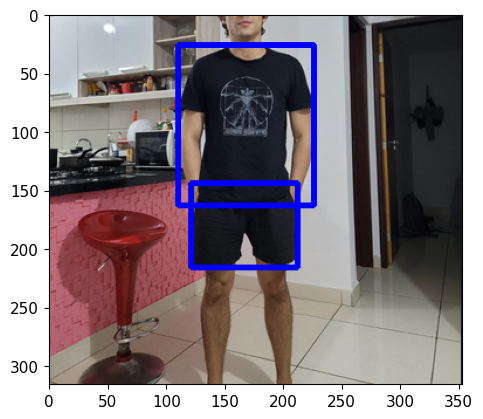

In [4]:

%matplotlib inline
plt.imshow(frame)
plt.show()

In [18]:
# salvando modelo como objeto

torch.save(model.state_dict(), 'PS_TAIL.pt')


In [ ]:
model.load_state_dict()